<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [382]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers

In [383]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [384]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [385]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [386]:
model = tf.keras.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1000, activation='relu'))
# model.add(layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(10))
# model.add(layers.Softmax())

In [387]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [388]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/20
118/118 [==============================] - 16s 130ms/step - loss: 0.5544 - accuracy: 0.8011 - val_loss: 0.4555 - val_accuracy: 0.8322
Epoch 2/20
118/118 [==============================] - 15s 129ms/step - loss: 0.3831 - accuracy: 0.8603 - val_loss: 0.4039 - val_accuracy: 0.8542
Epoch 3/20
118/118 [==============================] - 15s 130ms/step - loss: 0.3409 - accuracy: 0.8747 - val_loss: 0.3586 - val_accuracy: 0.8721
Epoch 4/20
118/118 [==============================] - 15s 130ms/step - loss: 0.3133 - accuracy: 0.8848 - val_loss: 0.3593 - val_accuracy: 0.8707
Epoch 5/20
118/118 [==============================] - 15s 128ms/step - loss: 0.2964 - accuracy: 0.8911 - val_loss: 0.3358 - val_accuracy: 0.8776
Epoch 6/20
118/118 [==============================] - 15s 128ms/step - loss: 0.2860 - accuracy: 0.8931 - val_loss: 0.3437 - val_accuracy: 0.8729
Epoch 7/20
118/118 [==============================] - 15s 124ms/step - loss: 0.2725 - accuracy: 0.8988 - val_loss: 0.3403 - val_ac

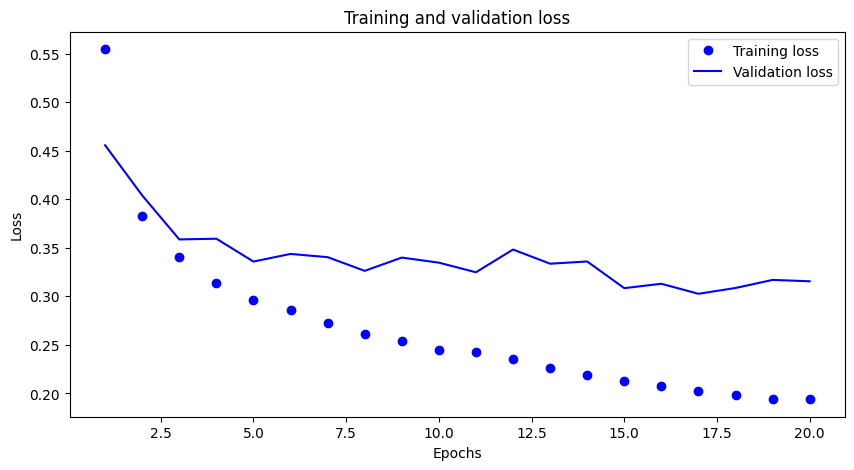

<Figure size 640x480 with 0 Axes>

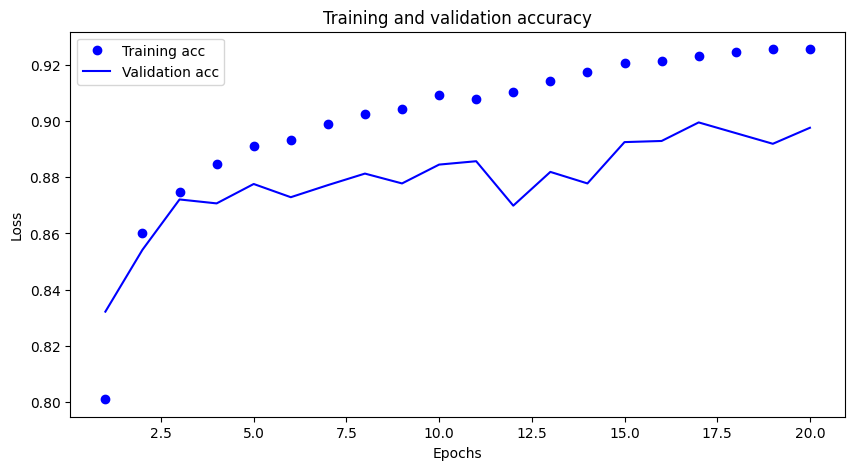

In [389]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [390]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [391]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [392]:
predictions[0]

array([2.87154496e-08, 1.69063004e-08, 3.97389055e-09, 1.48214783e-08,
       5.50362111e-09, 1.13069500e-05, 1.41276555e-08, 1.93142891e-03,
       9.14013032e-10, 9.98057187e-01], dtype=float32)